In [1]:
#!/usr/bin/env python
# coding: utf-8

from sympy import *
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
# from competitive_function import *
from competitive_func_utils import *

import warnings
warnings.filterwarnings('ignore')

import os
if not os.path.exists('plots/'):
    os.mkdir('plots')
if not os.path.exists('data_saved/'):
    os.mkdir('data_saved')
if not os.path.exists('data_saved/CB_control'):
    os.mkdir('data_saved/CB_control')
if not os.path.exists('data_saved/CH_control'):
    os.mkdir('data_saved/CH_control')


        
model_type_col= ['MIC','MHC','MHC_MIC']
control_variate= ['CB','CH']


def data_save(filename, Xdata, Ydata,type='None'):
    combined_data = [ Xdata, Ydata]
    combined_data = [[row[i] for row in combined_data] for i in range(len(combined_data[0]))]
    if type=='CB_control':
        filename_saving= ('data_saved/CB_control/OutPut_'+filename+'.txt')
    elif type=='CH_control':
        filename_saving= ('data_saved/CH_control/OutPut_'+filename+'.txt')
    with open(filename_saving, 'w+') as output_file:
        np.savetxt(output_file, combined_data,fmt='%.14e')


    output_file.close()


# CB_ control variate

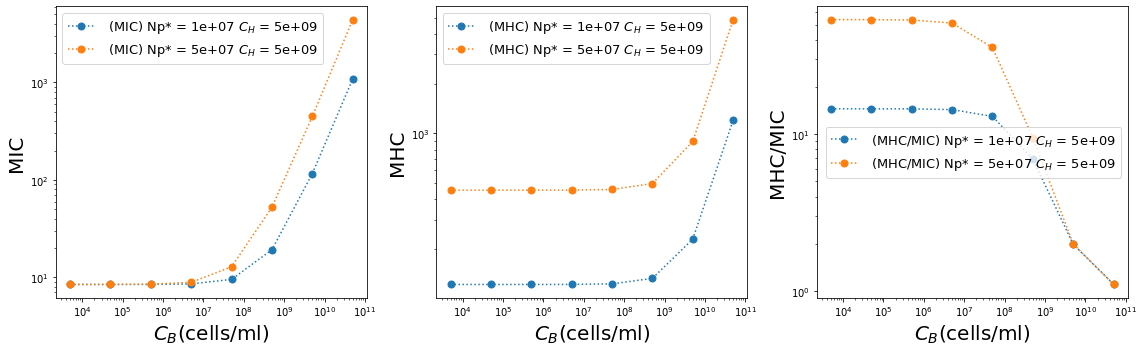

In [2]:
sur_B=1; sur_H=1;


CB_range= [5*10**i for i in range(3,11)]
Np_range = [10**7 , 5*10**7]
# CH_range_1=[ 2*10**10]
CH_range_1=[ 5*10**9]
plt.figure(figsize=(16,5))

for CH in CH_range_1:
    for Np in Np_range:
        MIC_membrane = [] 
        MHC_membrane = []
        MHC_MIC_membrane = [] 

        for CB in CB_range: 
            tmp_MIC = MIC_competitive_cell(CB, CH, Np,17)
            MIC_membrane.append(tmp_MIC)

            tmp_MHC = MHC_competitive_cell(CB, CH , Np,17)
            MHC_membrane.append(tmp_MHC)

            MHC_MIC_membrane.append(tmp_MHC/tmp_MIC)


        DIR_TEMPLATE= '%%s_%%s_Np_%1.0f_CH_%1.0f'%(Np,CH)
        filename1 = DIR_TEMPLATE %(model_type_col[0], control_variate[0] )
        filename2 = DIR_TEMPLATE %(model_type_col[1], control_variate[0])
        filename3 = DIR_TEMPLATE %(model_type_col[2], control_variate[0])
    # *******CB_controll_MIC*******
        plt.subplot(1,3,2)
        plt.plot(CB_range, MHC_membrane,label= ' (MHC) Np* = %2.e'%(Np) +' $C_H$ = %2.e'%(CH),
                 marker="o", linestyle = ':', markersize= 7)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('$C_B $(cells/ml)',size=20)
        plt.ylabel('MHC',size=20)
        plt.legend(fontsize=13)

        plt.subplot(1,3,1)
        
        plt.plot(CB_range, MIC_membrane,label= ' (MIC) Np* = %2.e'%(Np) +' $C_H$ = %2.e'%(CH),
                 marker="o", linestyle = ':', markersize= 7)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('$C_B $(cells/ml)',size=20)
        plt.ylabel('MIC',size=20)
        plt.legend(fontsize=13)
        
        plt.subplot(1,3,3)
        plt.plot(CB_range, MHC_MIC_membrane,label= ' (MHC/MIC) Np* = %2.e'%(Np) +' $C_H$ = %2.e'%(CH),
                 marker="o", linestyle = ':', markersize= 7)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('$C_B $(cells/ml)',size=20)
        plt.ylabel('MHC/MIC',size=20)
        plt.legend(fontsize=13)
        data_save(filename1,CB_range, MIC_membrane,'CB_control')
        data_save(filename2,CB_range, MHC_membrane,'CB_control')
        data_save(filename3,CB_range, MHC_MIC_membrane,'CB_control')

plt.tight_layout()
plt.savefig('plots/'+('plot_for_peptide_trapping_CB_control')+'.pdf',bbox_inches='tight')



# CH control variate

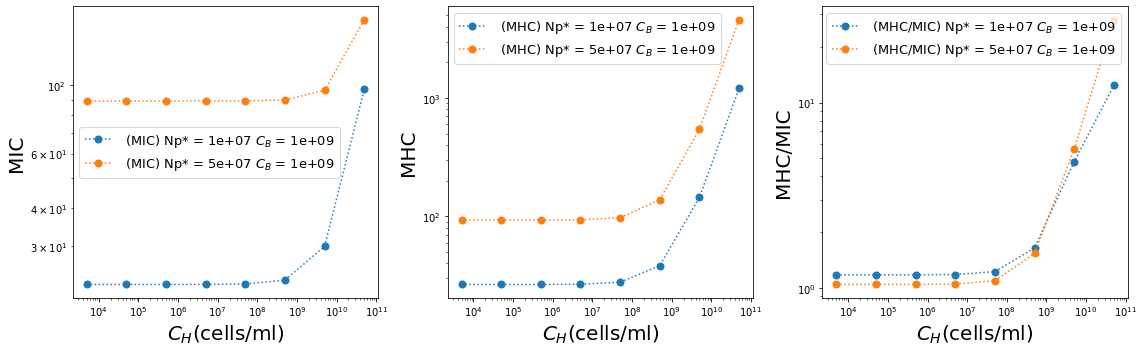

In [3]:
sur_B=1; sur_H=1;


CH_range= [5*10**i for i in range(3,11)]
Np_range = [10**7 , 5*10**7]
CB_range_1=[ 10**9]
plt.figure(figsize=(16,5))

for CB in CB_range_1:
    for Np in Np_range:
        MIC_membrane = [] 
        MHC_membrane = []
        MHC_MIC_membrane = [] 

        for CH in CH_range: 
            tmp_MIC = MIC_competitive_cell(CB, CH, Np,17)
            MIC_membrane.append(tmp_MIC)

            tmp_MHC = MHC_competitive_cell(CB, CH, Np,17 )
            MHC_membrane.append(tmp_MHC)

            MHC_MIC_membrane.append(tmp_MHC/tmp_MIC)


        DIR_TEMPLATE= '%%s_%%s_Np_%1.0f_CH_%1.0f'%(Np,CB)
        filename1 = DIR_TEMPLATE %(model_type_col[0], control_variate[1] )
        filename2 = DIR_TEMPLATE %(model_type_col[1], control_variate[1])
        filename3 = DIR_TEMPLATE %(model_type_col[2], control_variate[1])
    # *******CH_controll_MIC_MHC*******
    
    
        plt.subplot(1,3,1)
        plt.plot(CH_range, MIC_membrane,label= ' (MIC) Np* = %2.e'%(Np) +' $C_B$ = %2.e'%(CB),
                 marker="o", linestyle = ':', markersize= 7)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('$C_H $(cells/ml)',size=20)
        plt.ylabel('MIC',size=20)
        plt.legend(fontsize=13)
        
        plt.subplot(1,3,2)
        plt.plot(CH_range, MHC_membrane,label= ' (MHC) Np* = %2.e'%(Np) +' $C_B$ = %2.e'%(CB),
                 marker="o", linestyle = ':', markersize= 7)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('$C_H $(cells/ml)',size=20)
        plt.ylabel('MHC',size=20)
        plt.legend(fontsize=13)

        
        plt.subplot(1,3,3)
        plt.plot(CH_range, MHC_MIC_membrane,label= ' (MHC/MIC) Np* = %2.e'%(Np) +' $C_B$ = %2.e'%(CB),
                 marker="o", linestyle = ':', markersize= 7)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('$C_H $(cells/ml)',size=20)
        plt.ylabel('MHC/MIC',size=20)
        plt.legend(fontsize=13)
        data_save(filename1,CH_range, MIC_membrane,'CH_control')
        data_save(filename2,CH_range, MHC_membrane,'CH_control')
        data_save(filename3,CH_range, MHC_MIC_membrane,'CH_control')


plt.tight_layout()
plt.savefig('plots/'+('plot_for_peptide_trapping_CH_control')+'.pdf',bbox_inches='tight')
   


# CB=CH control variate

<Figure size 396x324 with 0 Axes>

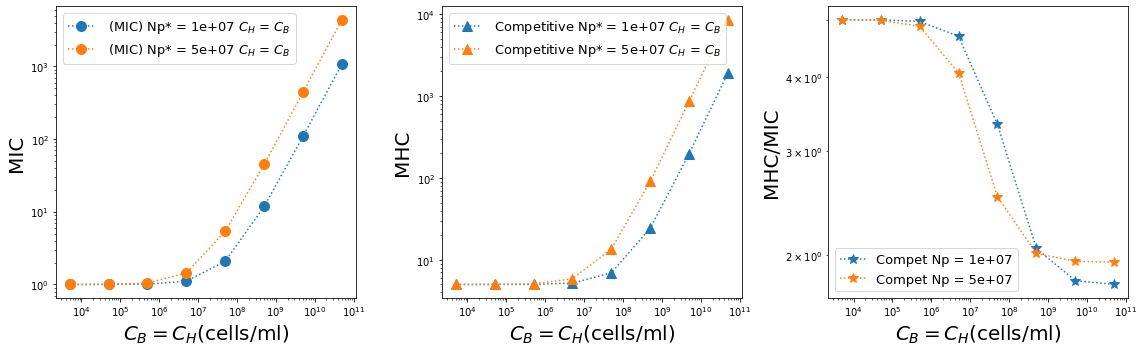

In [4]:
sur_B=1; sur_H=1;
plt.figure(figsize=(5.5,4.5))

CB_range= [5*10**i for i in range(3,11)]
Np_range = [10**7 , 5*10**7]

plt.figure(figsize=(16,5))

for Np in Np_range:
    MIC_membrane = [] 
    MHC_membrane = []
    MHC_MIC_membrane = [] 

    for CB in CB_range: 
        tmp_MIC = MIC_competitive_cell(CB, CB, Np,1)
        MIC_membrane.append(tmp_MIC)

        tmp_MHC = MHC_competitive_cell(CB, CB, Np,1)
        MHC_membrane.append(tmp_MHC)

        MHC_MIC_membrane.append(tmp_MHC/tmp_MIC)


    DIR_TEMPLATE= '%%s_%%s_Np_%1.0f_CB_equal_CH'%(Np)
    filename1 = DIR_TEMPLATE %(model_type_col[0], control_variate[1])
    filename2 = DIR_TEMPLATE %(model_type_col[1], control_variate[1])
    filename3 = DIR_TEMPLATE %(model_type_col[2], control_variate[1])
    # *******CB_controll_MIC*******
    plt.subplot(1,3,1)
    plt.plot(CB_range, MIC_membrane,label= ' (MIC) Np* = %2.e'%(Np) +' $C_H$ = $C_B$',
             marker="o", linestyle = ':', markersize= 10)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$C_B = C_H $(cells/ml)',size=20)
    plt.ylabel('MIC',size=20)
    plt.legend(fontsize=13)

    plt.subplot(1,3,2)
    plt.plot(CB_range, MHC_membrane,label= ' Competitive Np* = %2.e'%(Np) +' $C_H$ = $C_B$',
             marker="^", linestyle = ':', markersize= 10)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$C_B = C_H $(cells/ml)',size=20)
    plt.ylabel('MHC',size=20)
    plt.legend(fontsize=13)

    plt.subplot(1,3,3)
    plt.plot(CB_range, MHC_MIC_membrane,label= 'Compet Np = %2.e'%(Np),
             marker="*", linestyle = ':', markersize= 10)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$C_B = C_H $(cells/ml)',size=20)
    plt.ylabel('MHC/MIC',size=20)
    plt.legend(fontsize=13)

    
    data_save(filename1,CB_range, MIC_membrane,'CH_control')
    data_save(filename2,CB_range, MHC_membrane,'CH_control')
    data_save(filename3,CB_range, MHC_MIC_membrane,'CH_control')


plt.tight_layout()
plt.savefig('plots/'+('plot_for_peptide_trapping_CB_CH_equal_control')+'.pdf',bbox_inches='tight')
  
    